<a href="https://colab.research.google.com/github/AnkitG0204/DataScience-Demo-2026/blob/main/Data_science_notbeook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [6]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [4]:
df.shape

(61942, 5)

## EDA

In [7]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


<Axes: xlabel='cases', ylabel='deaths'>

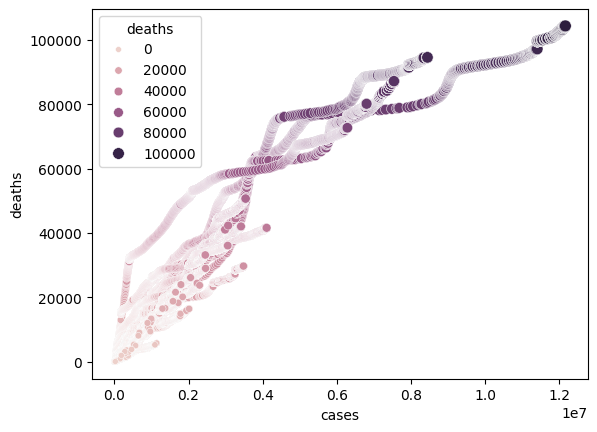

In [8]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue = "deaths", size="deaths", data=df)

#### Date Based EDA

In [9]:
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

In [16]:
from datetime import date, timedelta
today = date.today() - timedelta(days = 365*3)
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two Days Ago {daybefore}")

Today 2023-01-07
Two Days Ago 2023-01-05


In [17]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2023-01-05,Alabama,1,1587224,21263
2023-01-05,Alaska,2,302138,1408
2023-01-05,American Samoa,60,8266,34
2023-01-05,Arizona,4,2384521,32311
2023-01-05,Arkansas,5,987848,12712


/tmp/ipython-input-2749997224.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)


<Axes: xlabel='deaths', ylabel='Density'>

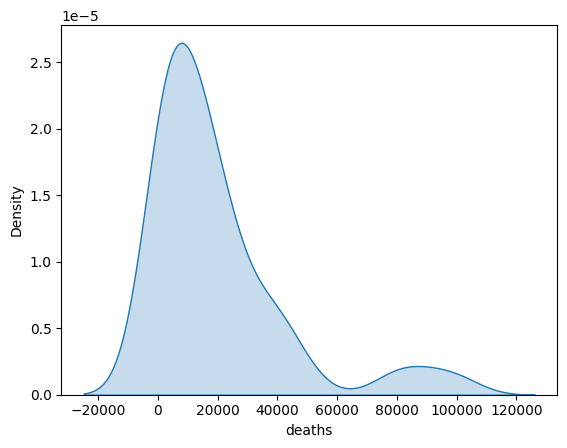

In [19]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [20]:
current_df = df.loc[daybefore:today].sort_values(by = ["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-01-06,California,6,11881668,101322
2023-01-07,California,6,11881668,101322
2023-01-05,California,6,11879543,101297
2023-01-06,Texas,48,8151596,92874
2023-01-07,Texas,48,8151596,92874
2023-01-05,Texas,48,8151596,92870
2023-01-06,Florida,12,7350177,84176
2023-01-07,Florida,12,7350177,84176
2023-01-05,Florida,12,7269428,83912


In [21]:
current_df.shape

(168, 4)

In [25]:
top_ten_states = set(current_df["state"].head(10).values)
top_ten_states

{'California', 'Florida', 'New York', 'Texas'}

In [26]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns=['fips'])

In [27]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Texas'}

<Figure size 1500x500 with 0 Axes>

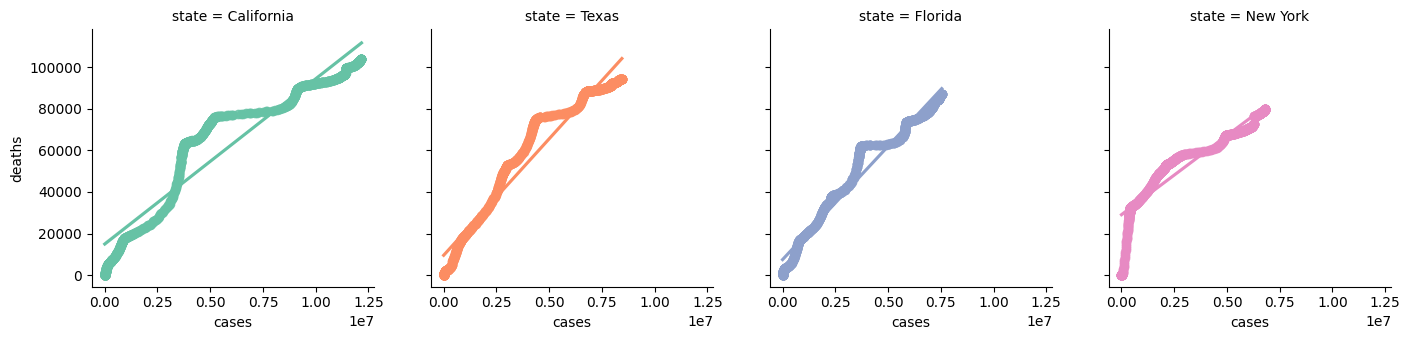

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x = "cases", y = "deaths",
                height = 3.5,
                col = "state",
                col_wrap = 5,
                hue = "state",
                palette="Set2",
                data = top_states_df)
ax.fig.subplots_adjust(wspace = .2)

In [29]:
top_states_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=False)
top_states_current_df.head()

,state,cases,deaths
date,,,
2023-01-06,California,11881668,101322
2023-01-07,California,11881668,101322
2023-01-05,California,11879543,101297
2023-01-04,California,11835660,101177
2023-01-03,California,11833426,100924


from matplotlib import pyplot as plt
_df_4['cases'].plot(kind='hist', bins=20, title='cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['deaths'].plot(kind='hist', bins=20, title='deaths')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cases', y='deaths', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['cases'].plot(kind='line', figsize=(8, 4), title='cases')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['deaths'].plot(kind='line', figsize=(8, 4), title='deaths')
plt.gca().spines[['top', 'right']].set_visible(False)

In [32]:
import plotly.io as pio
pio.renderers.default = "colab"
import plotly.express as px
fig = px.scatter(top_states_current_df, x = top_states_current_df.index, y = "cases", size = "deaths",)
fig.show()

In [36]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)|–", "", regex=True)
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [37]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
sugar_covid_df = df.merge(cdc_employed_df, how="inner", on = "state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily
0,California,6,1,0,22.9
1,Arizona,4,1,0,33.0
2,California,6,2,0,22.9
3,Arizona,4,1,0,33.0
4,California,6,2,0,22.9


In [40]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,False,True
1,Alaska,Republicans,False,True
2,Arizona,Republicans,False,True
3,Arkansas,Republicans,False,True
4,California,Democrats,True,False


In [43]:
sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
sugar_covid_df.head()

,state,fips,cases,deaths,employed-sugar-intake-daily,Winning Party_x,Democrats_x,Republicans_x,Winning Party_y,Democrats_y,Republicans_y
0,California,6,1,0,22.9,Democrats,True,False,Democrats,True,False
1,Arizona,4,1,0,33.0,Republicans,False,True,Republicans,False,True
2,California,6,2,0,22.9,Democrats,True,False,Democrats,True,False
3,Arizona,4,1,0,33.0,Republicans,False,True,Republicans,False,True
4,California,6,2,0,22.9,Democrats,True,False,Democrats,True,False


In [47]:
sugar_covid_df.corr(numeric_only=True)

,fips,cases,deaths,employed-sugar-intake-daily,Democrats_x,Republicans_x,Democrats_y,Republicans_y
fips,1.000000,-0.120943,-0.127549,0.269999,-0.187330,0.187330,-0.187330,0.187330
cases,-0.120943,1.000000,0.935557,-0.124204,0.221498,-0.221498,0.221498,-0.221498
deaths,-0.127549,0.935557,1.000000,-0.161596,0.299948,-0.299948,0.299948,-0.299948
employed-sugar-intake-daily,0.269999,-0.124204,-0.161596,1.000000,-0.767539,0.767539,-0.767539,0.767539
Democrats_x,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000,1.000000,-1.000000
Republicans_x,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000,-1.000000,1.000000
Democrats_y,-0.187330,0.221498,0.299948,-0.767539,1.000000,-1.000000,1.000000,-1.000000
Republicans_y,0.187330,-0.221498,-0.299948,0.767539,-1.000000,1.000000,-1.000000,1.000000


In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=sugar_covid_df.corr(numeric_only=True),
                   x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
                   hoverongaps = False))
fig.show()


In [50]:
sugar_covid_df.to_csv("covid-eda.csv")

## Modeling

### Classification Algorithm A

### Classification Algorithm B

## Conclusion
